<a href="https://colab.research.google.com/github/sakp7/Watermark-Adder/blob/main/Watermark_Adder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Water Mark Adder Project
 Required Libraries:
  opencv
  numpy
  image

In [1]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

 Here we take The picture we want to add the logo.

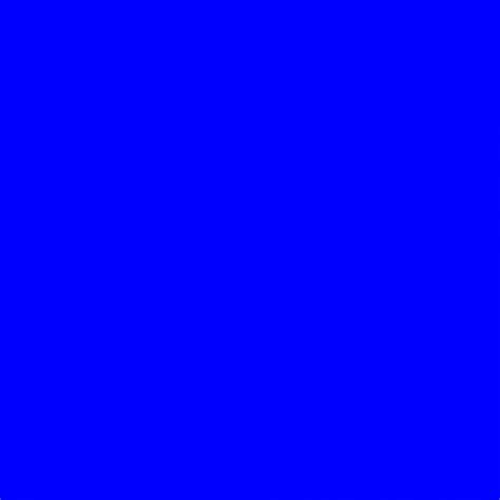

In [4]:
image =Image.open("/content/blue.jfif") #to not get error in this cell you need to replace the existing path with your path.
#Here goes the path
image_logow = image.resize((500,500))
image_logow

Here we take the logo.

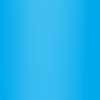

In [7]:
# Reading logo form url
logo = Image.open(requests.get('https://wallpapercave.com/wp/wp3253627.png', stream=True).raw)
logo = logo.resize((100,100))
logo

Now we need to find the roi(region of interest) to place our logo on the image.

In [8]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 4)
center_x = int(w_image / 4)
top_y = center_y - int(h_logo / 4)
left_x = center_x - int(w_logo / 4)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [10]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

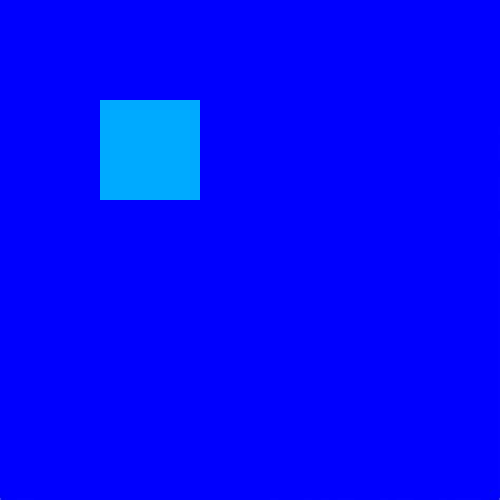

In [11]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img